<a href="https://colab.research.google.com/github/tyri0n11/distributed-system/blob/main/6_2_Loading_and_Saving_Data_in_Spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading and Saving Data in Spark

Collab Only code:

In [17]:
!apt-get update -qq
!apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
!java -version
!wget -q https://archive.apache.org/dist/spark/spark-3.5.3/spark-3.5.3-bin-hadoop3.tgz
!tar xf spark-3.5.3-bin-hadoop3.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.3-bin-hadoop3"
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True)
spark.range(5).show()


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
openjdk version "17.0.16" 2025-07-15
OpenJDK Runtime Environment (build 17.0.16+8-Ubuntu-0ubuntu122.04.1)
OpenJDK 64-Bit Server VM (build 17.0.16+8-Ubuntu-0ubuntu122.04.1, mixed mode, sharing)
+---+
| id|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
+---+



In [18]:
!ls

sample_data			 spark-3.1.1-bin-hadoop3.2.tgz.3
spark-3.1.1-bin-hadoop3.2	 spark-3.5.3-bin-hadoop3
spark-3.1.1-bin-hadoop3.2.tgz	 spark-3.5.3-bin-hadoop3.tgz
spark-3.1.1-bin-hadoop3.2.tgz.1  spark-3.5.3-bin-hadoop3.tgz.1
spark-3.1.1-bin-hadoop3.2.tgz.2


**Not on Colab you should start form HERE:**

Reading a text file `textFile()` in Python

In [19]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("Learning_Spark") \
    .getOrCreate()

sc = spark.sparkContext
lines = sc.textFile("spark-3.1.1-bin-hadoop3.2/README.md")

In [20]:
lines

spark-3.1.1-bin-hadoop3.2/README.md MapPartitionsRDD[13] at textFile at NativeMethodAccessorImpl.java:0

In [21]:
# collect the RDD to a list
list_lines = lines.collect()

In [22]:
# print the list
for line in list_lines:
  print(line)

# Apache Spark

Spark is a unified analytics engine for large-scale data processing. It provides
high-level APIs in Scala, Java, Python, and R, and an optimized engine that
supports general computation graphs for data analysis. It also supports a
rich set of higher-level tools including Spark SQL for SQL and DataFrames,
MLlib for machine learning, GraphX for graph processing,
and Structured Streaming for stream processing.

<https://spark.apache.org/>

[![Jenkins Build](https://amplab.cs.berkeley.edu/jenkins/job/spark-master-test-sbt-hadoop-2.7-hive-2.3/badge/icon)](https://amplab.cs.berkeley.edu/jenkins/job/spark-master-test-sbt-hadoop-2.7-hive-2.3)
[![AppVeyor Build](https://img.shields.io/appveyor/ci/ApacheSoftwareFoundation/spark/master.svg?style=plastic&logo=appveyor)](https://ci.appveyor.com/project/ApacheSoftwareFoundation/spark)
[![PySpark Coverage](https://img.shields.io/badge/dynamic/xml.svg?label=pyspark%20coverage&url=https%3A%2F%2Fspark-test.github.io%2Fpyspark-coverage-si

Loading all the .md files in one directory

In [23]:
input = sc.textFile("spark-3.1.1-bin-hadoop3.2/*.md")

**Only in Google Colab:**

Load the example1.json JSON file (found on iCollege under Datasets)

In [26]:
from google.colab import files
files.upload()

Saving log_test.json to log_test.json


{'log_test.json': b'{\n    "test month": "May",\n    "list new stores": [\n        "Lake Purple City_Branch",\n        "New Road Branch",\n        "Xintaifu Square Branch"\n    ],\n    "list top correlated stores of new stores": {\n        "Lake Purple City Branch": [\n            433023,\n            433024,\n            433043,\n            433040,\n            433042,\n            433010,\n            433028,\n            433004,\n            433047,\n            433035,\n            433019,\n            433021,\n            433048,\n            433029,\n            433007,\n            433026,\n            433005,\n            433027,\n            433012,\n            433018,\n            433011,\n            433008,\n            433036,\n            433032,\n            433013,\n            433044,\n            433017,\n            433006,\n            433025\n        ],\n        "New Road Branch": [\n            433023,\n            433034,\n            433003,\n            43300

In [28]:
jsonDF = spark.read.json('log_test.json')
jsonDF.printSchema()

root
 |-- _corrupt_record: string (nullable = true)



# Saving Text Files

Using the USDA_activity_dataset_csv dataset (found on iCollege under Datasets)

**Only in Google Colab:**

Load the USDA file from Disk.

NOTEL: Convert it to CSV on Excel first!

Note: You might have to run this twice so it works fine.

In [29]:
from google.colab import files
files.upload()

Saving loan_data.csv to loan_data.csv


{'loan_data.csv': b'credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid\r1,debt_consolidation,0.1189,829.1,11.35040654,19.48,737,5639.958333,28854,52.1,0,0,0,0\r1,credit_card,0.1071,228.22,11.08214255,14.29,707,2760,33623,76.7,0,0,0,0\r1,debt_consolidation,0.1357,366.86,10.37349118,11.63,682,4710,3511,25.6,1,0,0,0\r1,debt_consolidation,0.1008,162.34,11.35040654,8.1,712,2699.958333,33667,73.2,1,0,0,0\r1,credit_card,0.1426,102.92,11.29973224,14.97,667,4066,4740,39.5,0,1,0,0\r1,credit_card,0.0788,125.13,11.90496755,16.98,727,6120.041667,50807,51,0,0,0,0\r1,debt_consolidation,0.1496,194.02,10.71441777,4,667,3180.041667,3839,76.8,0,0,1,1\r1,all_other,0.1114,131.22,11.00209984,11.08,722,5116,24220,68.6,0,0,0,1\r1,home_improvement,0.1134,87.19,11.40756495,17.25,682,3989,69909,51.1,1,0,0,0\r1,debt_consolidation,0.1221,84.12,10.20359214,10,707,2730.041667,5630,23,1,0,0,0\r1,debt_consolidation

**Reading a CSV file into a DataFrame, filter some columns and save it**

In [30]:
data = spark.read.csv('loan_data.csv',inferSchema=True, header=True)
data.show(6)

+-------------+------------------+--------+-----------+--------------+-----+----+-----------------+---------+----------+--------------+-----------+-------+--------------+
|credit.policy|           purpose|int.rate|installment|log.annual.inc|  dti|fico|days.with.cr.line|revol.bal|revol.util|inq.last.6mths|delinq.2yrs|pub.rec|not.fully.paid|
+-------------+------------------+--------+-----------+--------------+-----+----+-----------------+---------+----------+--------------+-----------+-------+--------------+
|            1|debt_consolidation|  0.1189|      829.1|   11.35040654|19.48| 737|      5639.958333|    28854|      52.1|             0|          0|      0|             0|
|            1|       credit_card|  0.1071|     228.22|   11.08214255|14.29| 707|           2760.0|    33623|      76.7|             0|          0|      0|             0|
|            1|debt_consolidation|  0.1357|     366.86|   10.37349118|11.63| 682|           4710.0|     3511|      25.6|             1|          

Filter data by several columns

In [31]:
dataF = data.select("purpose","dti","fico")

In [32]:
dataF.show(6)

+------------------+-----+----+
|           purpose|  dti|fico|
+------------------+-----+----+
|debt_consolidation|19.48| 737|
|       credit_card|14.29| 707|
|debt_consolidation|11.63| 682|
|debt_consolidation|  8.1| 712|
|       credit_card|14.97| 667|
|       credit_card|16.98| 727|
+------------------+-----+----+
only showing top 6 rows



Save only the filtered Data

In [33]:
dataF.write.csv("credits.csv")

In [34]:
!ls

credits.csv    spark-3.1.1-bin-hadoop3.2	spark-3.1.1-bin-hadoop3.2.tgz.3
loan_data.csv  spark-3.1.1-bin-hadoop3.2.tgz	spark-3.5.3-bin-hadoop3
log_test.json  spark-3.1.1-bin-hadoop3.2.tgz.1	spark-3.5.3-bin-hadoop3.tgz
sample_data    spark-3.1.1-bin-hadoop3.2.tgz.2	spark-3.5.3-bin-hadoop3.tgz.1


Let's read this new file back into an RDD

In [35]:
rddL=sc.textFile("credits.csv")
rddL.collect()

['debt_consolidation,19.48,737',
 'credit_card,14.29,707',
 'debt_consolidation,11.63,682',
 'debt_consolidation,8.1,712',
 'credit_card,14.97,667',
 'credit_card,16.98,727',
 'debt_consolidation,4.0,667',
 'all_other,11.08,722',
 'home_improvement,17.25,682',
 'debt_consolidation,10.0,707',
 'debt_consolidation,22.09,677',
 'debt_consolidation,9.16,662',
 'debt_consolidation,15.49,767',
 'small_business,6.5,747',
 'debt_consolidation,9.73,727',
 'major_purchase,13.04,702',
 'all_other,2.26,672',
 'credit_card,7.07,797',
 'debt_consolidation,3.8,712',
 'major_purchase,2.74,667',
 'all_other,16.08,772',
 'all_other,2.59,797',
 'credit_card,7.94,662',
 'credit_card,7.05,782',
 'debt_consolidation,8.8,672',
 'all_other,10.0,712',
 'all_other,0.28,802',
 'debt_consolidation,14.29,662',
 'all_other,0.28,772',
 'all_other,3.72,812',
 'debt_consolidation,2.3,742',
 'credit_card,6.4,692',
 'home_improvement,0.0,777',
 'home_improvement,11.33,762',
 'credit_card,15.55,757',
 'all_other,3.83,772

In [36]:
from google.colab import files
files.upload()

Saving cat.jpg to cat.jpg


{'cat.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\n\x07\x08\x16\x16\x15\x18\x16\x15\x16\x19\x18\x18\x1a\x1a\x1a\x18\x18\x18\x18\x18\x18\x18\x1a\x18\x18\x18\x18\x1a\x1a\x18\x1a\x19\x18\x1c!.%\x1c\x1e+!\x18\x18&8&+/1555\x1a$;@;4?.451\x01\x0c\x0c\x0c\x10\x0f\x10\x1a\x12\x12\x1e4+$!44444444444444444444444444444444444444444444444444\xff\xc0\x00\x11\x08\x00\xb7\x01\x13\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x00\x01\x02\x03\x05\x06\x07\x08\xff\xc4\x00>\x10\x00\x02\x01\x02\x04\x04\x04\x03\x06\x04\x04\x06\x03\x00\x00\x00\x01\x02\x00\x03\x11\x04\x12!1\x05AQa\x06"q\x812\x91\xa1\x13B\xb1\xc1\xd1\xe1\x14Rb\xf0r\x82\x92\xf1\x15#\xa2\xb2\xc2\xd2\x07\x163\xff\xc4\x00\x18\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\xff\xc4\x00\x1d\x11\x01\x01\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x11\x12!1AQq\

In [37]:
# Load image data
from pyspark.ml.image import ImageSchema

image = spark.read.format("image").load("cat.jpg")

In [38]:
image

image
{file:///content/...


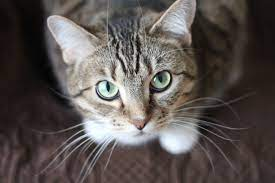

In [39]:
from IPython.display import display, Image
display(Image(filename='cat.jpg'))

In [40]:
from google.colab import files
files.upload()

Saving userdata1.parquet to userdata1.parquet


{'userdata1.parquet': b'PAR1\x15\x04\x15\xc8\xba\x01\x15\xc8\xba\x01L\x15\xc6\x0f\x15\x04\x00\x00\x00*\xe9l\xf2\x19\x00\x00N\x7f%\x00\x00^0\xd0\xe17\x00\x00N\x7f%\x00\x00.\xf9"\xcb\x03\x00\x00N\x7f%\x00\x00\xf2\xba\xcd\xfb\x01\x00\x00N\x7f%\x00\x00N\xbe\x04\xac\x10\x00\x00N\x7f%\x00\x00\xc4\xbc\x95&\x18\x00\x00N\x7f%\x00\x00\xa8\xcdc\x00\x1c\x00\x00N\x7f%\x00\x00\xa4\r\x1f7\x16\x00\x00N\x7f%\x00\x00\x92\xb3W\xb5\x0c\x00\x00N\x7f%\x00\x00N{~\x8f<\x00\x00N\x7f%\x00\x00\x94.z\x95\x00\x00\x00N\x7f%\x00\x00t\xa78/;\x00\x00N\x7f%\x00\x00*\xa3\xef\x91=\x00\x00N\x7f%\x00\x00\xf8g\xb7PG\x00\x00N\x7f%\x00\x00^rG\x1b\x1d\x00\x00N\x7f%\x00\x00\xea\xdd\xe7f\x02\x00\x00N\x7f%\x00\x00\x1a\x18\xc2&\x03\x00\x00N\x7f%\x00\x00\x10PN\xcf6\x00\x00N\x7f%\x00\x00\xf4\x1fO\x85&\x00\x00N\x7f%\x00\x00\xf8Vai"\x00\x00N\x7f%\x00\x00\xe8\x9f\x8c\x83+\x00\x00N\x7f%\x00\x00*\x1d\xb4\xf0;\x00\x00N\x7f%\x00\x00\xd6+\xb9\xb6=\x00\x00N\x7f%\x00\x00\xc8v\xecg\r\x00\x00N\x7f%\x00\x00.[\xc3?7\x00\x00N\x7f%\x00\x00\x84\xe2`

In [41]:
# using SQLContext to read parquet file
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

# to read parquet file
df = sqlContext.read.parquet('userdata1.parquet')

In [42]:
df.show(5)

+-------------------+---+----------+---------+--------------------+------+--------------+----------------+------------+---------+---------+--------------------+--------+
|  registration_dttm| id|first_name|last_name|               email|gender|    ip_address|              cc|     country|birthdate|   salary|               title|comments|
+-------------------+---+----------+---------+--------------------+------+--------------+----------------+------------+---------+---------+--------------------+--------+
|2016-02-03 07:55:29|  1|    Amanda|   Jordan|    ajordan0@com.com|Female|   1.197.201.2|6759521864920116|   Indonesia| 3/8/1971| 49756.53|    Internal Auditor|   1E+02|
|2016-02-03 17:04:03|  2|    Albert|  Freeman|     afreeman1@is.gd|  Male|218.111.175.34|                |      Canada|1/16/1968|150280.17|       Accountant IV|        |
|2016-02-03 01:09:31|  3|    Evelyn|   Morgan|emorgan2@altervis...|Female|  7.161.136.94|6767119071901597|      Russia| 2/1/1960|144972.51| Structural

# **Hive Example**

Using Hive to create and read a table - Simple Example

In [43]:
from pyspark.sql import Row
from pyspark.sql import HiveContext
sqlContext = HiveContext(sc)
test_list = [('A', 25),('B', 20),('C', 25),('D', 18)]
rdd = sc.parallelize(test_list)
people = rdd.map(lambda x: Row(name=x[0], age=int(x[1])))
schemaPeople = sqlContext.createDataFrame(people)
# Register it as a temp table
sqlContext.registerDataFrameAsTable(schemaPeople, "test_table")
sqlContext.sql("show tables").show()

Traceback (most recent call last):
  File "/content/spark-3.1.1-bin-hadoop3.2/python/pyspark/serializers.py", line 437, in dumps
    return cloudpickle.dumps(obj, pickle_protocol)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/content/spark-3.1.1-bin-hadoop3.2/python/pyspark/cloudpickle/cloudpickle_fast.py", line 72, in dumps
    cp.dump(obj)
  File "/content/spark-3.1.1-bin-hadoop3.2/python/pyspark/cloudpickle/cloudpickle_fast.py", line 540, in dump
    return Pickler.dump(self, obj)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "/content/spark-3.1.1-bin-hadoop3.2/python/pyspark/cloudpickle/cloudpickle_fast.py", line 630, in reducer_override
    return self._function_reduce(obj)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/content/spark-3.1.1-bin-hadoop3.2/python/pyspark/cloudpickle/cloudpickle_fast.py", line 503, in _function_reduce
    return self._dynamic_function_reduce(obj)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/content/spark-3.1.1-bin-hadoop3.2/python/

PicklingError: Could not serialize object: IndexError: tuple index out of range

Let's query the table

In [ ]:
sqlContext.sql("Select * from test_table").show()

**Load a JSON file with Hive and use SQL on it**

In [ ]:
## Colab code only - DO NOT run outsie of colab
from google.colab import files
files.upload()

Let's load example1.json with Hive a do a Select Statement on it

In [ ]:
from pyspark.sql import HiveContext
hiveCtx = HiveContext(sc)
ex1 = hiveCtx.read.json("log_test.json", multiLine=True)
ex1.registerTempTable("ex1")
results = hiveCtx.sql("SELECT targets FROM ex1").show()

In [ ]:
results = hiveCtx.sql("SELECT * FROM ex1").show()

In [ ]:
results = hiveCtx.sql("SELECT targets FROM ex1").show()